In [2]:
# bibliotecas manipulaçao de dados
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.core.display import display, HTML

# bibliotecas de Visualização
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')  #darkgrid , whitegrid , dark , white , and ticks 
import seaborn as sns
display(HTML("<style>.container {width:100% !important; }</style>"))

# maximiza o número de colunas e linhas para impressão 
# quando do uso da função head() do pandas
pd.options.display.max_columns = 15
pd.options.display.max_rows = 50
import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_643062/590801654.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  #darkgrid , whitegrid , dark , white , and ticks


In [3]:
train = pd.read_csv(r'../titanic/data/train.csv')
test = pd.read_csv(r'../titanic/data/test.csv')
gender_submission = pd.read_csv(r'../titanic/data/kaggle_submission.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [7]:
#Save PassengerId to assist in creating the file that will be sent to Kaggle
passengerId = test['PassengerId']


In [8]:
# Creating a new DF with Train and test
titanic_df = train._append(test, ignore_index=True)


In [9]:
# Apresentar Cabeçalho
display(HTML('<H3><B>BASE DE DADOS TITANIC<b></h3></hr>'))
# CONSTANTES
NUM_POPULACAO = titanic_df.shape[0]
NUM_ATRIBUTOS = titanic_df.shape[1]

# Carregando 1o amostras aleatórias
display(titanic_df.sample(10))
display(HTML('<hr/><b>População: </b>' + 
             str(NUM_POPULACAO) +
             ' | Númeor de Atributos: ' +
             str(NUM_ATRIBUTOS)  + '</H3>'))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
114,115,0.0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C
361,362,0.0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
1171,1172,NaN,3,"Oreskovic, Miss. Jelka",female,23.0,0,0,315085,8.6625,NaN,S
878,879,0.0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
944,945,NaN,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
285,286,0.0,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,NaN,C
1222,1223,NaN,1,"Dulles, Mr. William Crothers",male,39.0,0,0,PC 17580,29.7000,A18,C
442,443,0.0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,S
215,216,1.0,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C


In [10]:
# Missing
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
# type data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [12]:
# estictis data
titanic_df.describe().style.background_gradient(cmap = "Purples_r")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [13]:
# Creating the df where we will process the ML models
df = pd.DataFrame()

# Creating a function to help you visualize the information for each column

In [14]:
def titanic_analytics (data, column, number=True):
    print(f"Number of single values: {data[column].nunique()}")
    print(f"\nWhat are the unique values: {data[column].unique()}")
    print(f"\nNumber quantity missing: {data[column].isnull().sum()}")
    print(f"\nQuantity by option:  \n{data[column].value_counts()}")
    
    if number == True:
        sns.countplot(data = data, x= column, hue = 'Survived')
    else:
        sns.displot(data[column], kde=True)

# Analise de campos

## Survived

Number of single values: 2

What are the unique values: [ 0.  1. nan]

Number quantity missing: 418

Quantity by option:  
0.0    549
1.0    342
Name: Survived, dtype: int64


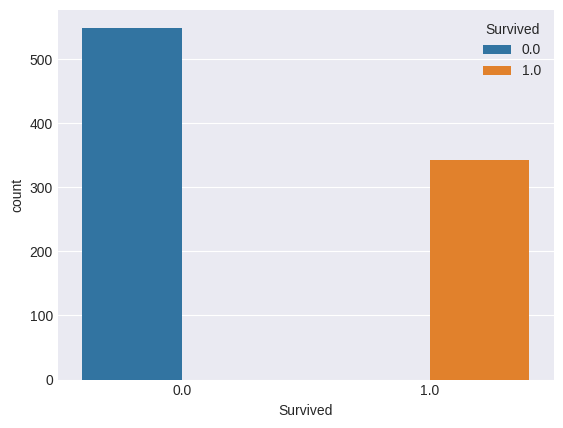

In [15]:
titanic_analytics(titanic_df, 'Survived')

In [16]:
df['Survived'] = titanic_df['Survived']
df

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1304,NaN
1305,NaN
1306,NaN
1307,NaN


## Pclass

Number of single values: 3

What are the unique values: [3 1 2]

Number quantity missing: 0

Quantity by option:  
3    709
1    323
2    277
Name: Pclass, dtype: int64


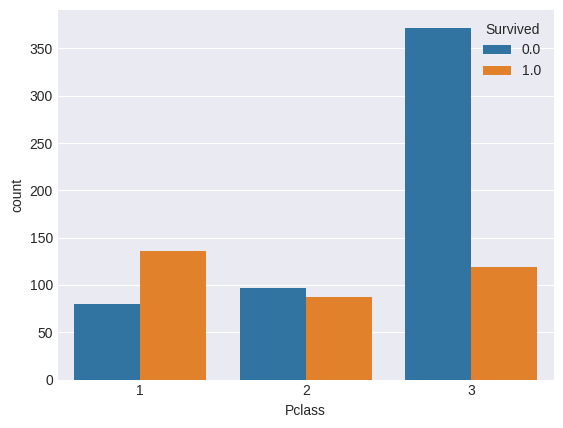

In [17]:
titanic_analytics(titanic_df, 'Pclass')

In [18]:
df['Pclass']=titanic_df['Pclass']
df

,Survived,Pclass
0,0.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,0.0,3
...,...,...
1304,NaN,3
1305,NaN,1
1306,NaN,3
1307,NaN,3


## Name

In [19]:
titanic_df['Name'].sample(10)

675              Edvardsson, Mr. Gustaf Hjalmar
11                     Bonnell, Miss. Elizabeth
1017                   Brobeck, Mr. Karl Rudolf
980                 Wells, Master. Ralph Lester
913        Flegenheim, Mrs. Alfred (Antoinette)
1092    Danbom, Master. Gilbert Sigvard Emanuel
1144                   Salander, Mr. Karl Johan
1224      Nakid, Mrs. Said (Waika Mary" Mowad)"
642               Skoog, Miss. Margit Elizabeth
1165                      Saade, Mr. Jean Nassr
Name: Name, dtype: object

### Title

In [20]:
# Create feature Title
titanic_df['Title']=titanic_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
titanic_df['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

Number of single values: 18

What are the unique values: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']

Number quantity missing: 0

Quantity by option:  
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64


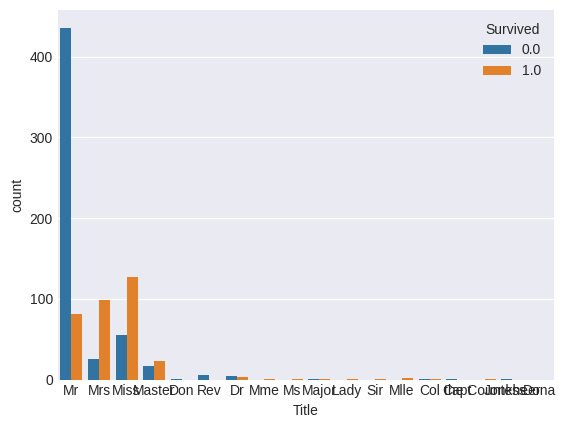

In [21]:
titanic_analytics(titanic_df, 'Title')

In [22]:
# Agrupando dos titulos de baixa frequência
titanic_df['Title'] = [n if n in ['Mr', 'Mrs', 'Miss', 'Master'] else 'Others' for n in titanic_df['Title'] ]
titanic_df['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305    Others
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

In [23]:
title = titanic_df['Title'].value_counts()
title

Mr        757
Miss      260
Mrs       197
Master     61
Others     34
Name: Title, dtype: int64

''

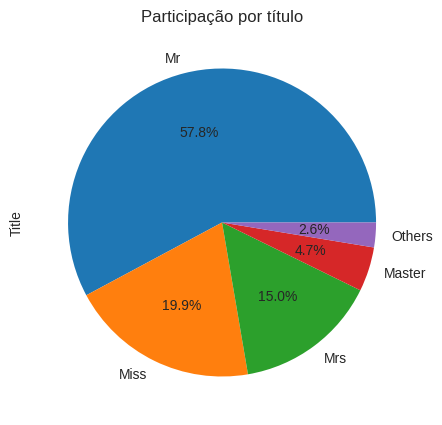

In [24]:

title.plot(kind='pie', autopct='%1.1f%%', figsize=(8,5))
plt.title("Participação por título")

;

Number of single values: 5

What are the unique values: ['Mr' 'Mrs' 'Miss' 'Master' 'Others']

Number quantity missing: 0

Quantity by option:  
Mr        757
Miss      260
Mrs       197
Master     61
Others     34
Name: Title, dtype: int64


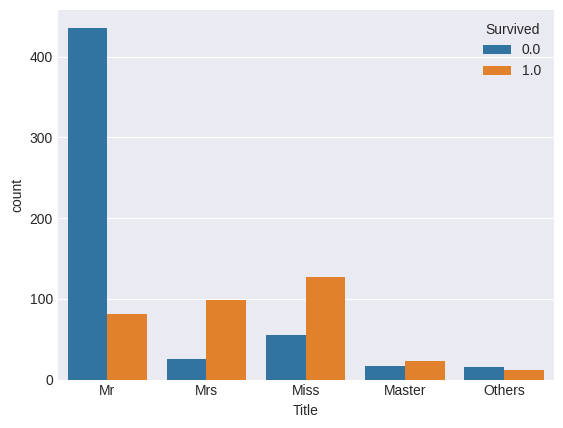

In [25]:
titanic_analytics(titanic_df, 'Title')

In [26]:
df['Title']=titanic_df['Title']
df

,Survived,Pclass,Title
0,0.0,3,Mr
1,1.0,1,Mrs
2,1.0,3,Miss
3,1.0,1,Mrs
4,0.0,3,Mr
...,...,...,...
1304,NaN,3,Mr
1305,NaN,1,Others
1306,NaN,3,Mr
1307,NaN,3,Mr


## Sex 

Number of single values: 2

What are the unique values: ['male' 'female']

Number quantity missing: 0

Quantity by option:  
male      843
female    466
Name: Sex, dtype: int64


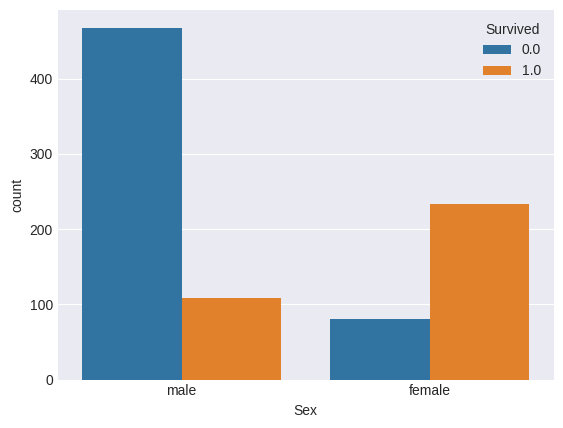

In [27]:
titanic_analytics(titanic_df, 'Sex')

In [28]:
df['Sex']=titanic_df['Sex']
df

,Survived,Pclass,Title,Sex
0,0.0,3,Mr,male
1,1.0,1,Mrs,female
2,1.0,3,Miss,female
3,1.0,1,Mrs,female
4,0.0,3,Mr,male
...,...,...,...,...
1304,NaN,3,Mr,male
1305,NaN,1,Others,female
1306,NaN,3,Mr,male
1307,NaN,3,Mr,male


## Age

Number of single values: 98

What are the unique values: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

Number quantity missing: 263

Quantity by option:  
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64


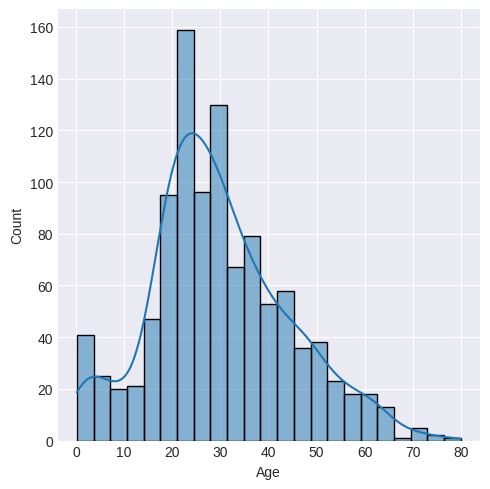

In [29]:
titanic_analytics(titanic_df, 'Age', False)

### Tratando dados NULOS 

In [30]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Others
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [31]:
titanic_df.loc[titanic_df['Title'] == 'Mr', 'Age'].mean()

32.25215146299484

In [32]:
for i in (titanic_df['Title'].unique()):
    print(f"Pesoas com o título {i} tem a média de idade de: {titanic_df.loc[titanic_df['Title'] == i, 'Age'].mean():.2f} ")


Pesoas com o título Mr tem a média de idade de: 32.25 
Pesoas com o título Mrs tem a média de idade de: 36.99 
Pesoas com o título Miss tem a média de idade de: 21.77 
Pesoas com o título Master tem a média de idade de: 5.48 
Pesoas com o título Others tem a média de idade de: 42.66 


In [33]:
titanic_df.loc[(titanic_df['Title']=='Mr') & (titanic_df['Age'].isna()), 'Age'] = round(titanic_df.loc[titanic_df['Title'] == 'Mr', 'Age'].mean(),0)
titanic_df.loc[(titanic_df['Title']=='Mrs') & (titanic_df['Age'].isna()), 'Age'] = round(titanic_df.loc[titanic_df['Title'] == 'Mrs', 'Age'].mean(),0)
titanic_df.loc[(titanic_df['Title']=='Miss') & (titanic_df['Age'].isna()), 'Age'] = round(titanic_df.loc[titanic_df['Title'] == 'Miss', 'Age'].mean(),0)
titanic_df.loc[(titanic_df['Title']=='Master') & (titanic_df['Age'].isna()), 'Age'] = round(titanic_df.loc[titanic_df['Title'] == 'Master', 'Age'].mean(),0)
titanic_df.loc[(titanic_df['Title']=='Others') & (titanic_df['Age'].isna()), 'Age'] = round(titanic_df.loc[titanic_df['Title'] == 'Others', 'Age'].mean(),0)

In [34]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

In [35]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [36]:
df['Age']=titanic_df['Age']
df

,Survived,Pclass,Title,Sex,Age
0,0.0,3,Mr,male,22.0
1,1.0,1,Mrs,female,38.0
2,1.0,3,Miss,female,26.0
3,1.0,1,Mrs,female,35.0
4,0.0,3,Mr,male,35.0
...,...,...,...,...,...
1304,NaN,3,Mr,male,32.0
1305,NaN,1,Others,female,39.0
1306,NaN,3,Mr,male,38.5
1307,NaN,3,Mr,male,32.0


### Score_Age 



In [37]:
#creating the intervals that we need to cut each range of ages
interval = (0, 5, 12, 18, 25, 35, 60, 120)

#df_train.Age = df_train.Age.fillna(-0.5)

#creating the intervals that we need to cut each range of ages
interval = (0, 5, 12, 18, 25, 35, 60, 120) 

#Seting the names that we want use to the categorys
categorias = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

In [38]:
# Aplicando o pd.cut e usando os parâmetros que criamos
#titanic_df['Score_Age']
titanic_df['Score_Age']=pd.cut(titanic_df['Age'], interval,labels=categorias )
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Score_Age
77,78,0.0,3,"Moutal, Mr. Rahamin Haim",male,32.0,0,0,374746,8.0500,NaN,S,Mr,Young
1159,1160,NaN,3,"Howard, Miss. May Elizabeth",female,22.0,0,0,A. 2. 39186,8.0500,NaN,S,Miss,Student
816,817,0.0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S,Miss,Student
281,282,0.0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S,Mr,Young
960,961,NaN,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S,Mrs,Adult
1054,1055,NaN,3,"Pearce, Mr. Ernest",male,32.0,0,0,343271,7.0000,NaN,S,Mr,Young
438,439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,Mr,Senior
37,38,0.0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S,Mr,Student
1185,1186,NaN,3,"Wittevrongel, Mr. Camille",male,36.0,0,0,345771,9.5000,NaN,S,Mr,Adult
165,166,1.0,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S,Master,Children


In [39]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.879809,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,13.192829,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,36.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Number of single values: 7

What are the unique values: ['Student', 'Adult', 'Young', 'babies', 'Teen', 'Children', 'Senior']
Categories (7, object): ['babies' < 'Children' < 'Teen' < 'Student' < 'Young' < 'Adult' < 'Senior']

Number quantity missing: 0

Quantity by option:  
Young       457
Adult       318
Student     300
Teen         99
babies       64
Children     38
Senior       33
Name: Score_Age, dtype: int64


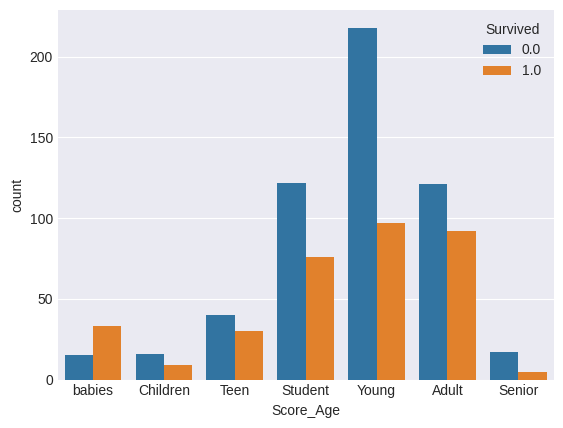

In [40]:
titanic_analytics(titanic_df, 'Score_Age')

Survived   0.0  1.0
Score_Age          
babies      15   33
Children    16    9
Teen        40   30
Student    122   76
Young      218   97
Adult      121   92
Senior      17    5


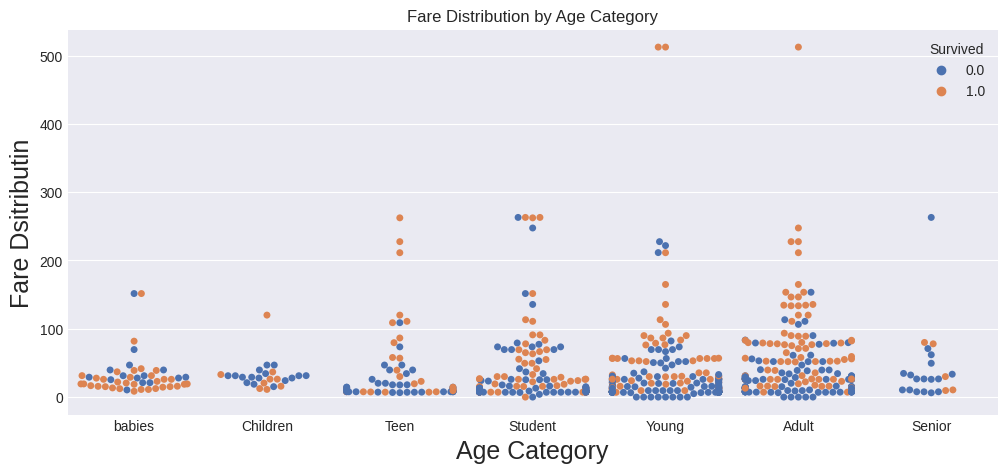

In [41]:
# Using pd.crosstab to understand the Survived rate by Age Category's
print(pd.crosstab(titanic_df['Score_Age'], titanic_df['Survived']))

plt.figure(figsize=(12,5))
sns.swarmplot(data=titanic_df, x='Score_Age',y='Fare', 
              hue='Survived',palette='deep')
plt.ylabel("Fare Dsitributin", fontsize=18)
plt.xlabel("Age Category", fontsize=18)
plt.title("Fare Distribution by Age Category")
plt.show() 


In [42]:
df['Score_Age'] = titanic_df['Score_Age']
df

,Survived,Pclass,Title,Sex,Age,Score_Age
0,0.0,3,Mr,male,22.0,Student
1,1.0,1,Mrs,female,38.0,Adult
2,1.0,3,Miss,female,26.0,Young
3,1.0,1,Mrs,female,35.0,Young
4,0.0,3,Mr,male,35.0,Young
...,...,...,...,...,...,...
1304,NaN,3,Mr,male,32.0,Young
1305,NaN,1,Others,female,39.0,Adult
1306,NaN,3,Mr,male,38.5,Adult
1307,NaN,3,Mr,male,32.0,Young


## SibSp

Number of single values: 7

What are the unique values: [1 0 3 4 2 5 8]

Number quantity missing: 0

Quantity by option:  
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


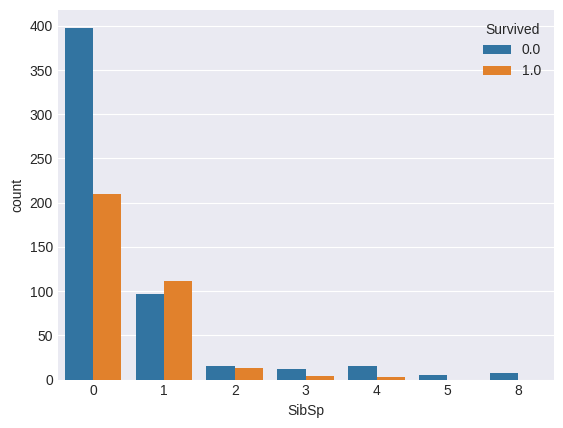

In [43]:
titanic_analytics(titanic_df, 'SibSp')

In [44]:
df['SibSp'] = titanic_df['SibSp']
df

,Survived,Pclass,Title,Sex,Age,Score_Age,SibSp
0,0.0,3,Mr,male,22.0,Student,1
1,1.0,1,Mrs,female,38.0,Adult,1
2,1.0,3,Miss,female,26.0,Young,0
3,1.0,1,Mrs,female,35.0,Young,1
4,0.0,3,Mr,male,35.0,Young,0
...,...,...,...,...,...,...,...
1304,NaN,3,Mr,male,32.0,Young,0
1305,NaN,1,Others,female,39.0,Adult,0
1306,NaN,3,Mr,male,38.5,Adult,0
1307,NaN,3,Mr,male,32.0,Young,0


## Parch

Number of single values: 8

What are the unique values: [0 1 2 5 3 4 6 9]

Number quantity missing: 0

Quantity by option:  
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64


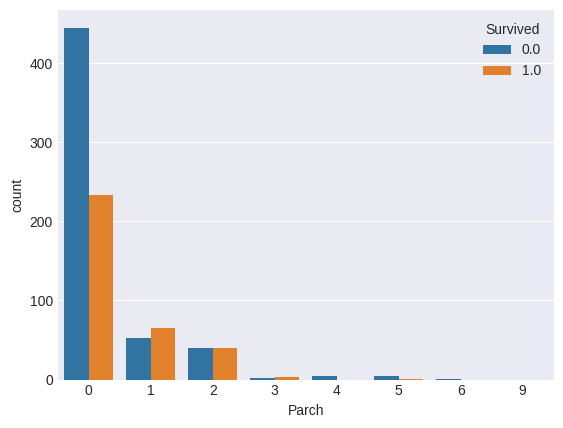

In [45]:
titanic_analytics(titanic_df, 'Parch')

In [46]:
df['Parch'] = titanic_df['Parch']
df

,Survived,Pclass,Title,Sex,Age,Score_Age,SibSp,Parch
0,0.0,3,Mr,male,22.0,Student,1,0
1,1.0,1,Mrs,female,38.0,Adult,1,0
2,1.0,3,Miss,female,26.0,Young,0,0
3,1.0,1,Mrs,female,35.0,Young,1,0
4,0.0,3,Mr,male,35.0,Young,0,0
...,...,...,...,...,...,...,...,...
1304,NaN,3,Mr,male,32.0,Young,0,0
1305,NaN,1,Others,female,39.0,Adult,0,0
1306,NaN,3,Mr,male,38.5,Adult,0,0
1307,NaN,3,Mr,male,32.0,Young,0,0


### FamilySize

In [47]:
titanic_df['FamilySize'] = titanic_df['SibSp']+titanic_df['Parch'] + 1
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Score_Age,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Student,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Young,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Young,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Young,1


Number of single values: 9

What are the unique values: [ 2  1  5  3  7  6  4  8 11]

Number quantity missing: 0

Quantity by option:  
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64


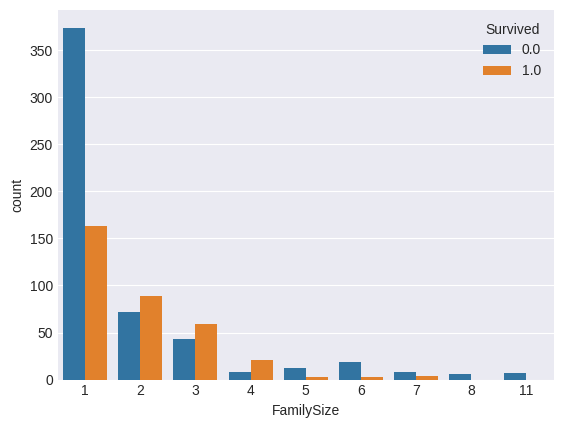

In [48]:
titanic_analytics(titanic_df, 'FamilySize')

In [49]:
df['FamilySize'] =  titanic_df['FamilySize']
df

,Survived,Pclass,Title,Sex,Age,Score_Age,SibSp,Parch,FamilySize
0,0.0,3,Mr,male,22.0,Student,1,0,2
1,1.0,1,Mrs,female,38.0,Adult,1,0,2
2,1.0,3,Miss,female,26.0,Young,0,0,1
3,1.0,1,Mrs,female,35.0,Young,1,0,2
4,0.0,3,Mr,male,35.0,Young,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,Mr,male,32.0,Young,0,0,1
1305,NaN,1,Others,female,39.0,Adult,0,0,1
1306,NaN,3,Mr,male,38.5,Adult,0,0,1
1307,NaN,3,Mr,male,32.0,Young,0,0,1


## fare

Number of single values: 281

What are the unique values: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05  

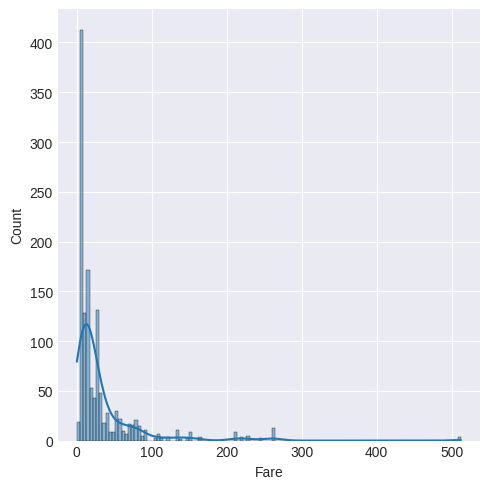

In [50]:
titanic_analytics(titanic_df, 'Fare', False)

### Tratando dados Nulos

In [51]:
titanic_df[titanic_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Score_Age,FamilySize
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,Senior,1


In [52]:
# vamos adicionar a mẽdia baseado em Pclass
media_fare = round(titanic_df.loc[titanic_df['Pclass'] == 3, 'Fare'].mean(),2)

In [53]:
titanic_df['Fare'].fillna(media_fare, inplace=True)

In [54]:
titanic_df[titanic_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Score_Age,FamilySize


In [55]:
df['Fare'] = titanic_df['Fare']

In [56]:
df

,Survived,Pclass,Title,Sex,Age,Score_Age,SibSp,Parch,FamilySize,Fare
0,0.0,3,Mr,male,22.0,Student,1,0,2,7.2500
1,1.0,1,Mrs,female,38.0,Adult,1,0,2,71.2833
2,1.0,3,Miss,female,26.0,Young,0,0,1,7.9250
3,1.0,1,Mrs,female,35.0,Young,1,0,2,53.1000
4,0.0,3,Mr,male,35.0,Young,0,0,1,8.0500
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,Mr,male,32.0,Young,0,0,1,8.0500
1305,NaN,1,Others,female,39.0,Adult,0,0,1,108.9000
1306,NaN,3,Mr,male,38.5,Adult,0,0,1,7.2500
1307,NaN,3,Mr,male,32.0,Young,0,0,1,8.0500


## Cabin
Como esta variavel tem muitos dados nulos nós não vamos usado

In [57]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Score_Age,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Student,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Young,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Young,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Young,1


In [58]:
titanic_df['Cabin'].isnull().sum()

1014

## Embarked

Number of single values: 3

What are the unique values: ['S' 'C' 'Q' nan]

Number quantity missing: 2

Quantity by option:  
S    914
C    270
Q    123
Name: Embarked, dtype: int64


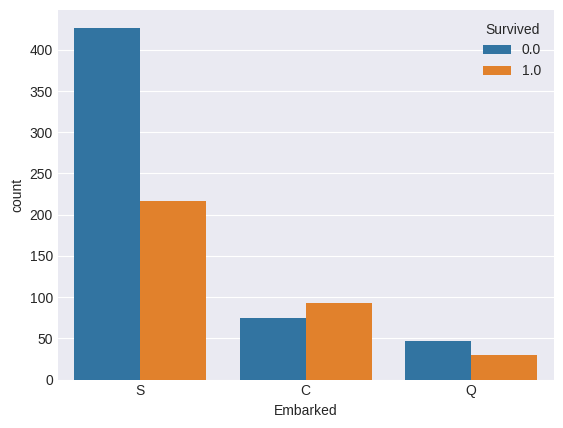

In [59]:
titanic_analytics(titanic_df, 'Embarked')

# Tratando dados missings

In [60]:
titanic_df['Embarked'].fillna('S', inplace=True)
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
Score_Age         0
FamilySize        0
dtype: int64

In [61]:
df['Embarked'] = titanic_df['Embarked']
df

,Survived,Pclass,Title,Sex,Age,Score_Age,SibSp,Parch,FamilySize,Fare,Embarked
0,0.0,3,Mr,male,22.0,Student,1,0,2,7.2500,S
1,1.0,1,Mrs,female,38.0,Adult,1,0,2,71.2833,C
2,1.0,3,Miss,female,26.0,Young,0,0,1,7.9250,S
3,1.0,1,Mrs,female,35.0,Young,1,0,2,53.1000,S
4,0.0,3,Mr,male,35.0,Young,0,0,1,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,Mr,male,32.0,Young,0,0,1,8.0500,S
1305,NaN,1,Others,female,39.0,Adult,0,0,1,108.9000,C
1306,NaN,3,Mr,male,38.5,Adult,0,0,1,7.2500,S
1307,NaN,3,Mr,male,32.0,Young,0,0,1,8.0500,S


In [62]:
# Apresentar Cabeçalho
display(HTML('<H3><B>BASE DE DADOS TITANIC PARA PRE-PROCESSAMENTO<b></h3></hr>'))
# CONSTANTES
NUM_POPULACAO = df.shape[0]
NUM_ATRIBUTOS = df.shape[1]

# Carregando 1o amostras aleatórias
display(df.sample(10))
display(HTML('<hr/><b>População: </b>' + 
             str(NUM_POPULACAO) +
             ' | Númeor de Atributos: ' +
             str(NUM_ATRIBUTOS)  + '</H3>'))

,Survived,Pclass,Title,Sex,Age,Score_Age,SibSp,Parch,FamilySize,Fare,Embarked
520,1.0,1,Miss,female,30.0,Young,0,0,1,93.5000,S
1015,NaN,3,Mr,male,32.0,Young,0,0,1,7.7500,Q
947,NaN,3,Mr,male,35.0,Young,0,0,1,7.8958,S
274,1.0,3,Miss,female,22.0,Student,0,0,1,7.7500,Q
443,1.0,2,Others,female,28.0,Young,0,0,1,13.0000,S
672,0.0,2,Mr,male,70.0,Senior,0,0,1,10.5000,S
415,0.0,3,Mrs,female,37.0,Adult,0,0,1,8.0500,S
1288,NaN,1,Mrs,female,48.0,Adult,1,1,3,79.2000,C
50,0.0,3,Master,male,7.0,Children,4,1,6,39.6875,S
826,0.0,3,Mr,male,32.0,Young,0,0,1,56.4958,S


#  Preprocessing 

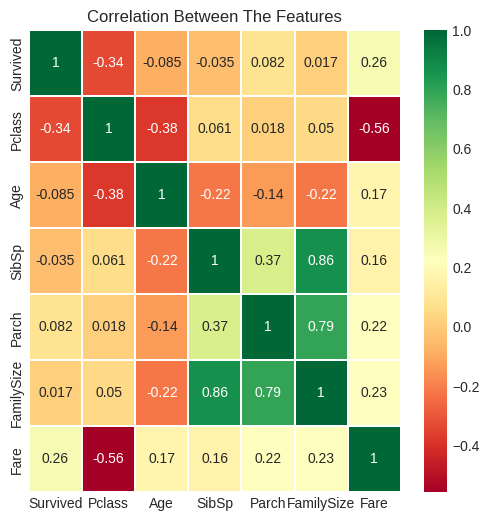

In [76]:
# Correlatio between features 
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) # "YlGnBu", "Blues", "Greens", 'BuPu'
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.title("Correlation Between The Features")
plt.show()